In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

N_IMAGES = 9

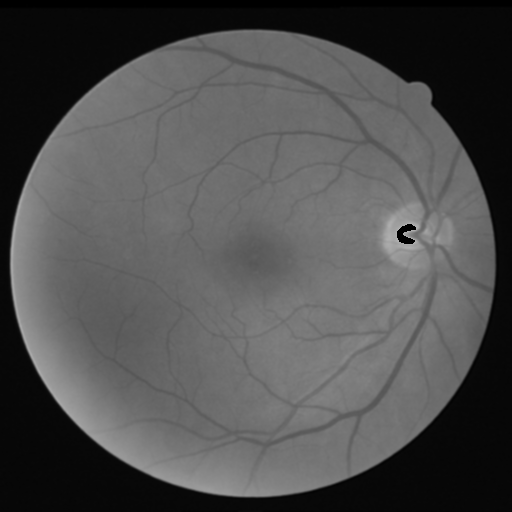

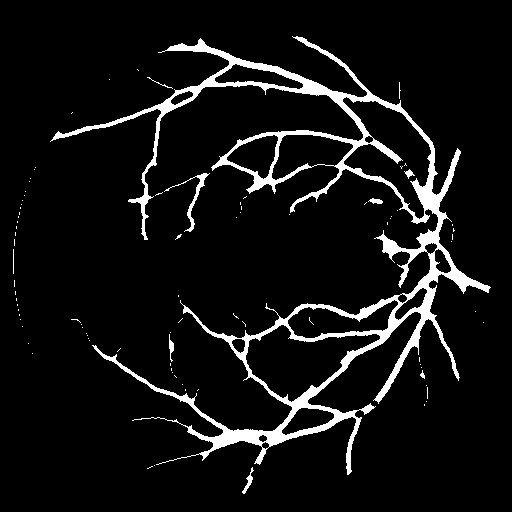

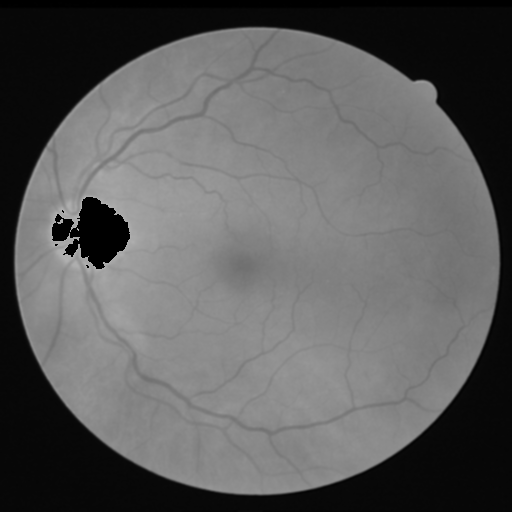

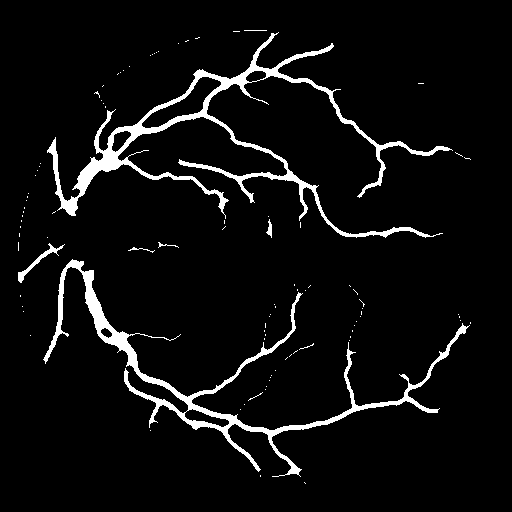

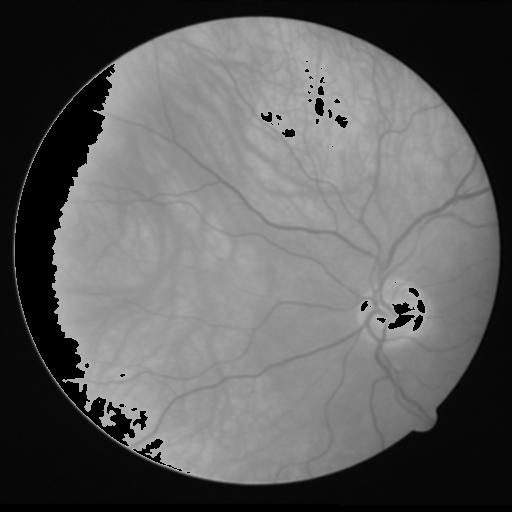

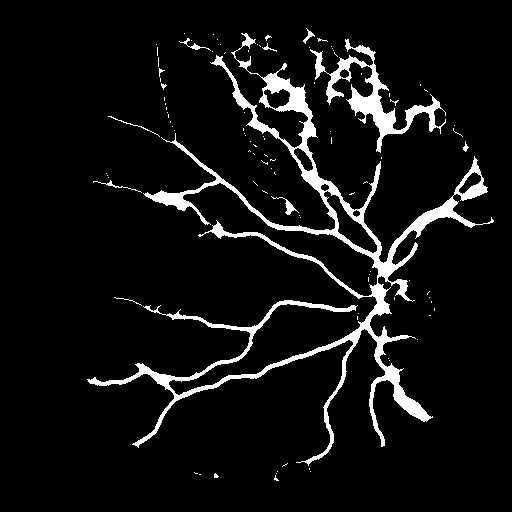

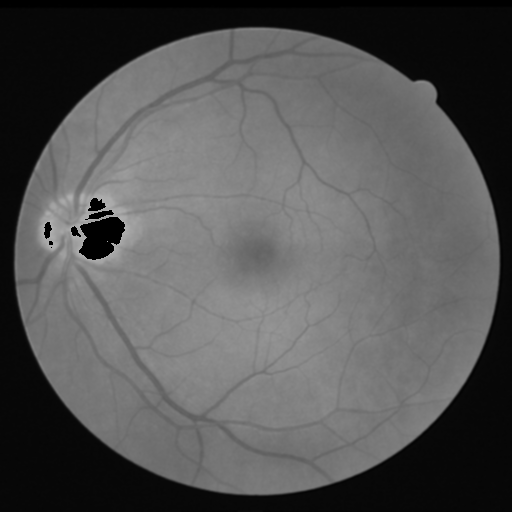

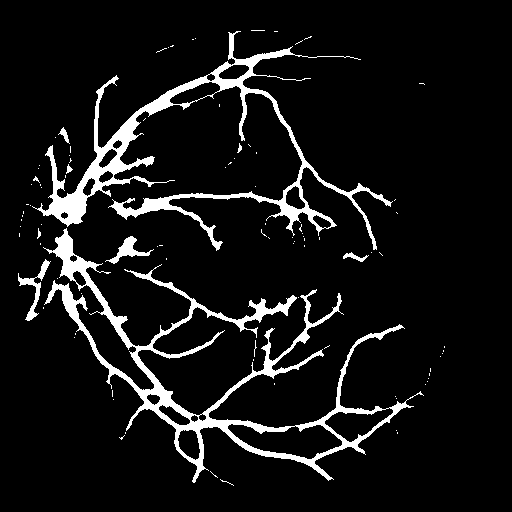

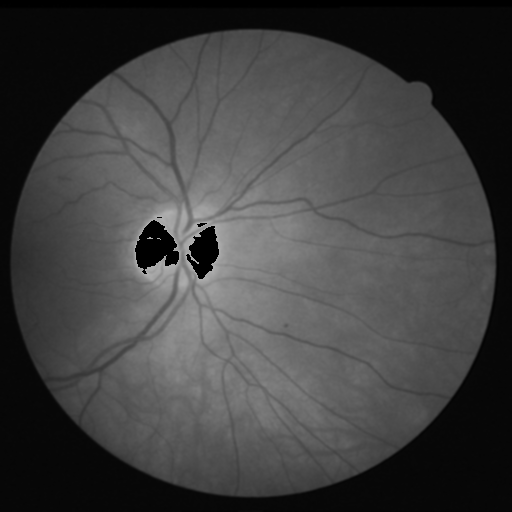

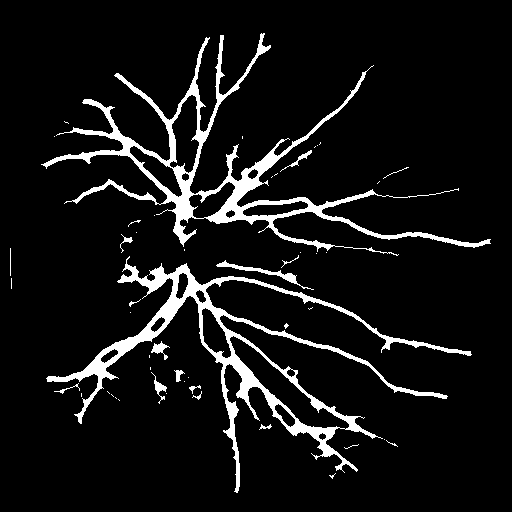

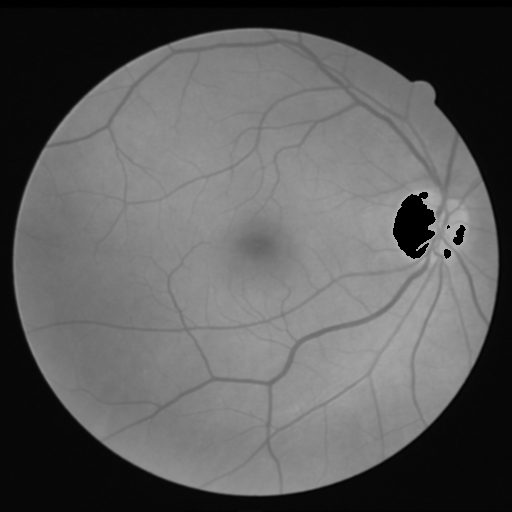

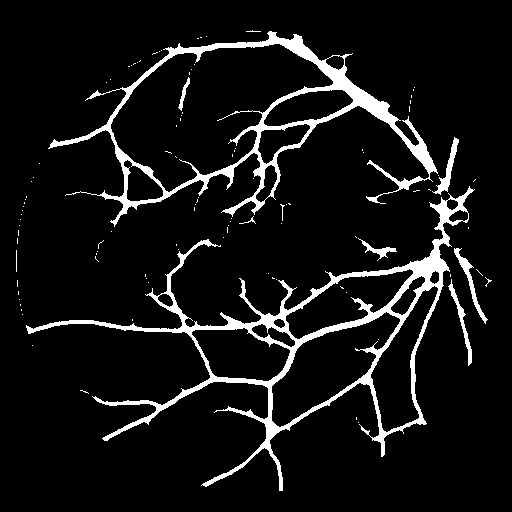

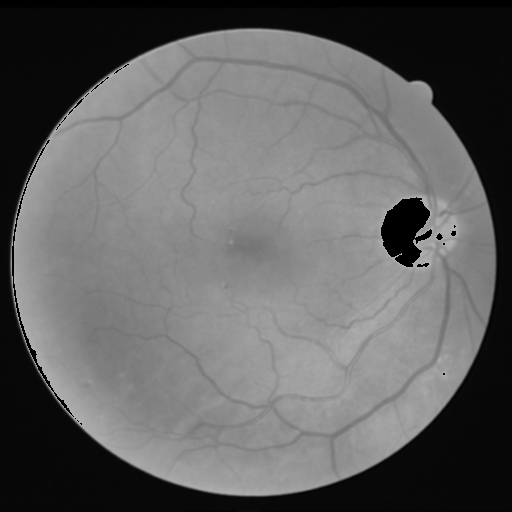

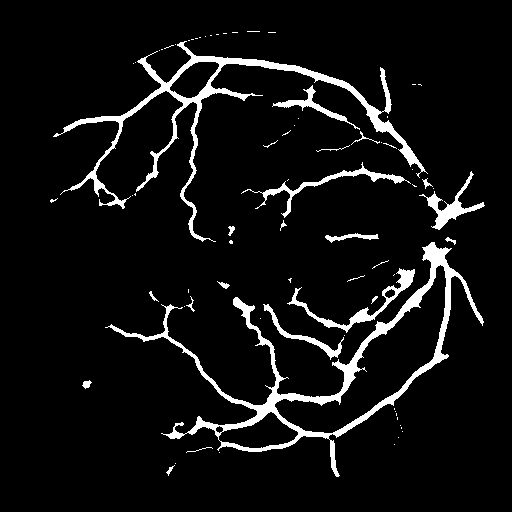

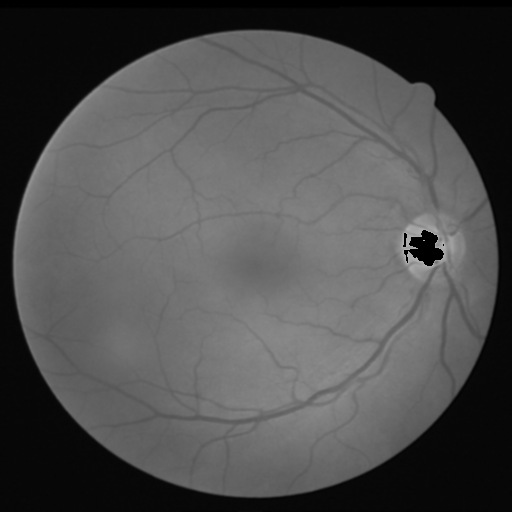

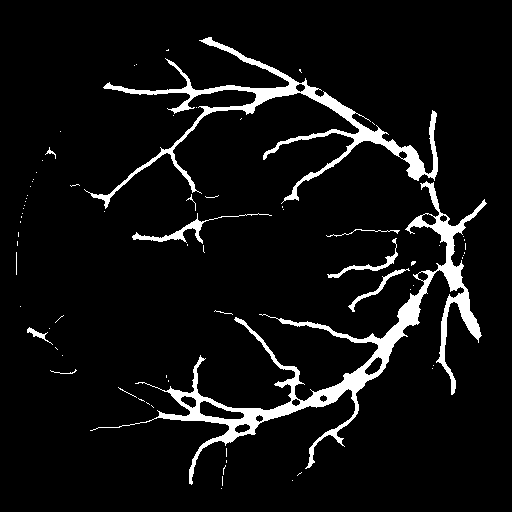

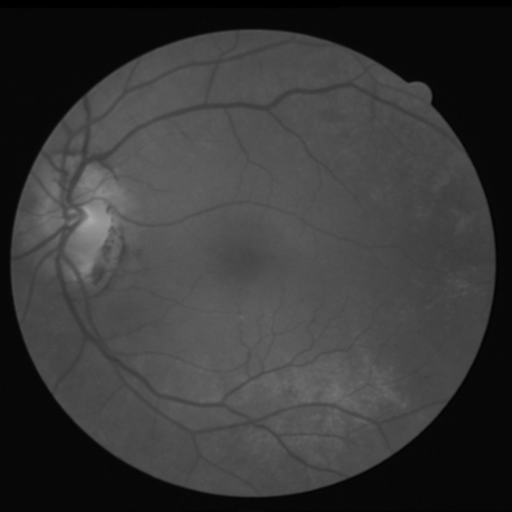

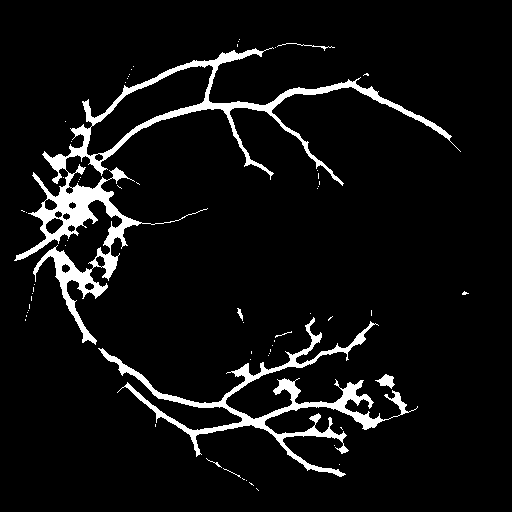

In [4]:
for i in range(0, N_IMAGES):
  img = cv2.imread(f"image/{i}.png")
  # print(i)
  # cv2_imshow(img)
  # cv2_imshow(red_img)
  # cv2_imshow(grayscale_img)
  # blurred = cv2.GaussianBlur(grayscale_img, (5, 5), 0)
  # cv2_imshow(blurred)
  # im2 = cv2.Canny(blurred, 100, 200)
  grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  blurred = cv2.GaussianBlur(grayscale_img, (3, 3), 1, 1)
  _, blurred = cv2.threshold(blurred, 175, 255, cv2.THRESH_TOZERO_INV)
  cv2_imshow(blurred)

  im1 = cv2.Canny(blurred, 15, 50)
  im2 = cv2.Canny(blurred, 100, 200)
  im1 -= im2
  kernel_d = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
  kernel_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
  final = cv2.dilate(im1, kernel_d, iterations= 3)
  final = cv2.erode(final, kernel_e, iterations= 1)
  final = cv2.erode(final, kernel_d, iterations= 1)
  # final = cv2.dilate(final, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2)), iterations =2)
  # final = cv2.erode(final, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)), iterations= 1)
  # final = cv2.erode(final, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2)), iterations= 2)
  # final = cv2.bitwise_and(im1, im1, mask = final)

  cv2_imshow(final)
  '''
  final = cv2.Canny(final, 50, 100)


  final = cv2.dilate(final, kernel_d, iterations= 2)
  final = cv2.erode(final, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)), iterations= 1)
  # final = cv2.erode(final, kernel_e, iterations= 1)
  # final = cv2.dilate(final, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1)), iterations =1)
  # final = cv2.erode(final, kernel_d, iterations= 1)
  '''
  '''
  hist = cv2.calcHist([grayscale_img], [0], None, [256], [0, 256])

  plt.figure()
  plt.title('Grayscale Histogram')
  plt.xlabel('Pixel Intensity')
  plt.ylabel('Frequency')
  plt.hist(grayscale_img.ravel(), 256, [0, 256])
  plt.show()
  # cv2_imshow(grayscale_img)
  final = grayscale_img.copy()
  m, n = final.shape
  mxm = np.max(hist) - 50
  mnm = np.min(hist) + 10
  for i in range(m):
    for j in range(n):
      if not (mnm <= final[i][j] <= mxm):
        final[i][j] = 255
      else:
        final[i][j] = 0

  cv2_imshow(final)
  '''
  # threshold = np.median(grayscale_img)
  # print(threshold)

  # final = grayscale_img
  # final[final >= cutoff] = 0
  # final[final < cutoff] = 255
  # final = im1
  # edges
  cv2.imwrite(f'output/{i}.png', final)



In [5]:
import matplotlib.pyplot as plt

all_masks = []

# Read all predicted masks
for i in range(N_IMAGES):
        mask = cv2.imread('output/' + str(i) + '.png')
        all_masks.append(mask)

# Encoding
def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), non 0 - mask, 0 - background
    Returns run length as list
    '''
    run_lengths = []
    for i in range(x.shape[0]*x.shape[1]):
        run_lengths.append([])
    current = 0
    count = 0
    start = 0
    flat = x.T.flatten()
    for i in range(len(flat)):
        dot = flat[i]
        if dot == 0:
            if current == 0:
                continue
            else:
                run_lengths[current-1].extend([start, count])
                current = 0
                count = 0
                start = 0
        else:
            if dot == current:
                count += 1
            elif count != 0:
                run_lengths[current-1].extend([start, count])
                current = 0
                count = 0
                start = 0
            else:
                start = i
                current = dot
                count += 1
    return run_lengths



# Write submission
import csv

# File name
filename = "submission.csv"

# Writing to CSV file
with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["id", "encoding"])  # Header
        for file_id in range(9):
            enc = rle_encoding(all_masks[file_id])
            writer.writerow([file_id, enc])  # Data row

print(f"{filename} has been created successfully.")

submission.csv has been created successfully.
